<font color='green'> <br> <h1> <center> Music Genre Classi cation using CNN+LSTM </center> </h1> <br> </font>

### Problem Statement

- The raw audio has been converted to mel-spectograms and pickled. There are 3 files for training, validation and testing on the.

- Dataset: Raw data is 8GB and consists of audio from 8000 songs and metadata with features like MFCC.

- Music Genre Classi cation using CNN+LSTM.

### Import Libraries/Dataset

In [2]:
# Import the required libraries.
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install seaborn

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense
from tensorflow import keras
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report

import time
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
### Checking GPA

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
filename_train = r'/content/drive/MyDrive/DL_Assignment/shuffled_train.npz'
filename_valid = r'/content/drive/MyDrive/DL_Assignment/shuffled_valid.npz'
filename_test = r'/content/drive/MyDrive/DL_Assignment/test_arr.npz'

Mounted at /content/drive


### Data Preprocessing

In [5]:
## load_dataset(prefix="/content/drive/MyDrive/Colab Notebooks/DL_Assignment/UCI HAR Dataset/UCI HAR Dataset/")

train_data = np.load(filename_train)
xtrain = train_data["arr_0"]
ytrain = train_data["arr_1"]
xtrain.shape
ytrain.shape

(6394, 8)

In [6]:
#Load the data into train and test data in the required format.
validation_data = np.load(filename_valid)
xval = validation_data["arr_0"]
yval = validation_data["arr_1"]

In [7]:
#Plot at least two samples and their captions (use matplotlib/seaborn/any other library).
X_train = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
X_val = xval.reshape((xval.shape[0], xval.shape[1], xval.shape[2], 1))

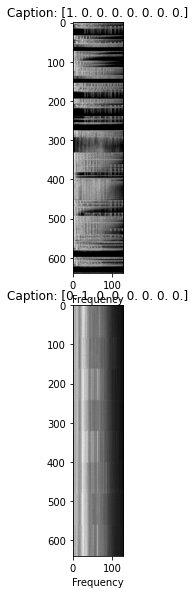

In [8]:
fig, axs = plt.subplots(2, figsize=(8, 8))
fig.tight_layout()

axs[0].imshow(X_train[0][:,:,0], cmap='gray')
axs[0].set_title('Caption: ' + str(ytrain[0]), fontsize=12)
axs[0].set_xlabel('Frequency', fontsize=10)


axs[1].imshow(X_train[1][:,:,0], cmap='gray')
axs[1].set_title('Caption: ' + str(ytrain[1]), fontsize=12)
axs[1].set_xlabel('Frequency', fontsize=10)

plt.show()


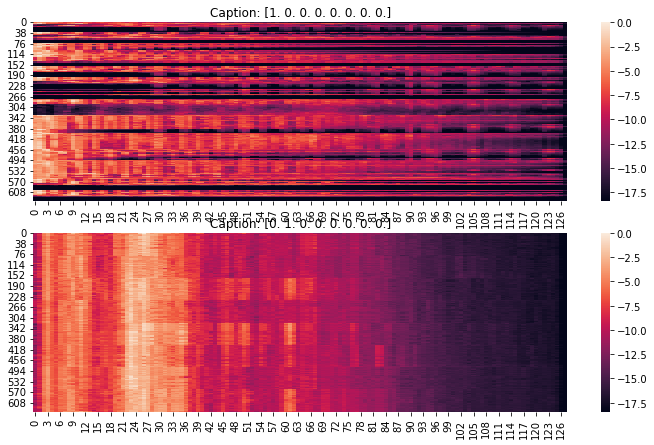

In [9]:

fig, axs = plt.subplots(2, figsize=(10, 6))
fig.tight_layout()

sns.heatmap(X_train[0][:,:,0], ax=axs[0])
axs[0].set_title('Caption: ' + str(ytrain[0]), fontsize=12)


sns.heatmap(X_train[1][:,:,0], ax=axs[1])
axs[1].set_title('Caption: ' + str(ytrain[1]), fontsize=12)


plt.show()

In [10]:
test_data = np.load(filename_test)
xTest = test_data["arr_0"]
yTest = test_data["arr_1"]

### Model Building

In [11]:
model = tf.keras.models.Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.3))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 638, 32)           12320     
                                                                 
 conv1d_1 (Conv1D)           (None, 636, 64)           6208      
                                                                 
 lstm (LSTM)                 (None, 636, 128)          98816     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
Total params: 167,272
Trainable params: 167,272
Non-trai

### Model Compilation

In [12]:
from time import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
class TimingCallback(Callback):
  def __init__(self):
    self.logs=[]
  def on_epoch_begin(self, epoch, logs={}):
    self.starttime=time()
  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(time()-self.starttime)


In [13]:

cb = TimingCallback()

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


* Loss Function - Categorical cross-entropy is used when true labels are one-hot encoded
* Optmizer - Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. Adam is relatively easy to configure where the default configuration parameters do well on most problems 

### Model Training

In [15]:
history = model.fit(X_train, ytrain, batch_size=64, epochs=200, validation_data=(X_val, yval), callbacks=[cb])

Epoch 1/200
100/100 [==============================] - 25s 89ms/step - loss: 2.0110 - accuracy: 0.2013 - val_loss: 1.9434 - val_accuracy: 0.2488
Epoch 2/200
100/100 [==============================] - 6s 61ms/step - loss: 1.8908 - accuracy: 0.2717 - val_loss: 1.8440 - val_accuracy: 0.3100
Epoch 3/200
100/100 [==============================] - 7s 68ms/step - loss: 1.8441 - accuracy: 0.2917 - val_loss: 1.8253 - val_accuracy: 0.2875
Epoch 4/200
100/100 [==============================] - 6s 62ms/step - loss: 1.8297 - accuracy: 0.3036 - val_loss: 1.8443 - val_accuracy: 0.2587
Epoch 5/200
100/100 [==============================] - 7s 68ms/step - loss: 1.8002 - accuracy: 0.3129 - val_loss: 1.8256 - val_accuracy: 0.2837
Epoch 6/200
100/100 [==============================] - 6s 64ms/step - loss: 1.7776 - accuracy: 0.3181 - val_loss: 1.7883 - val_accuracy: 0.3225
Epoch 7/200
100/100 [==============================] - 7s 66ms/step - loss: 1.7698 - accuracy: 0.3283 - val_loss: 1.7248 - val_accuracy

In [16]:
print("Total time taken is ",round(sum(cb.logs),2),"seconds")

Total time taken is  1346.08 seconds


#### Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

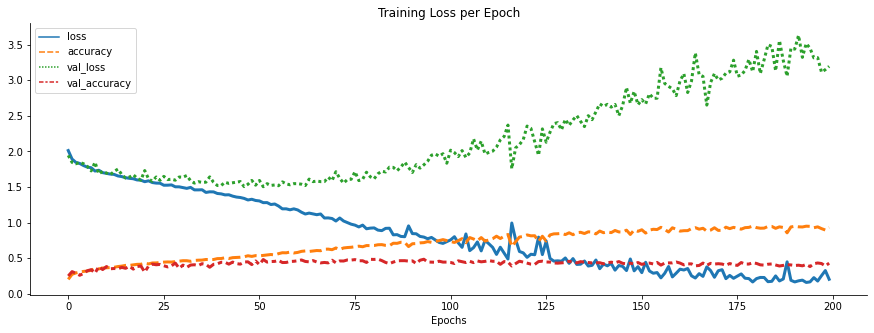

In [17]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

Print the total time taken for training.??

### Model Evaluation 

In [ ]:
### testing with 5 random samples
import random
index = random.choice(range(xTest.shape[0]))
print("Prediction for ",index,"  = ", model.predict([xTest[index:index+5]]).argmax(axis= 1), "True Values = ", yTest[index:index+5].argmax(axis= 1))

##### Accuracy of the Model

In [ ]:
cvscores = []
scores = model.evaluate(xTest, yTest, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
Ypred = model.predict(xTest)


#### Confusion Matrix

 performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.


![image.png](attachment:920f98ac-8c4c-4864-a90a-0b3d1fd9e416.png)
<br>
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(yTest.argmax(axis=1), Ypred.argmax(axis=1))
matrix

#### Accuracy,Precision, Recall, f1 score, 
<b>Accuracy :</b> The base metric used for model evaluation is often Accuracy, describing the number of correct predictions over all predictions<br>
<center><b>Accuracy = (TP + TN)/(TP + FP + TN + FN)</b></center>
<br>
<b>Recall</b> : Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data<br>
<center><b>Recall = TruePositives / (TruePositives + FalseNegatives)</b></center>
<br>
<b>Precision</b>  : Precision is a measure of how many of the positive predictions made are correct (true positives)<br>
<center><b>Precision = TruePositives / (TruePositives + FalsePositives)</b></center>
<br>
<b>F1 Score </b> :F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.
<br>
<center><b>F-Measure = (2 * Precision * Recall) / (Precision + Recall)</b></center>


In [ ]:
print("Classification Evaluation Matrix")
print("Accuracy Score : ",accuracy_score(yTest.argmax(axis=1), Ypred.argmax(axis=1)))
print("Precision Score : ",precision_score(yTest.argmax(axis=1), Ypred.argmax(axis=1),average="weighted",))
print("Recall Score : ",recall_score(yTest.argmax(axis=1), Ypred.argmax(axis=1),average="weighted"))
print("F1 Score : ",f1_score(yTest.argmax(axis=1), Ypred.argmax(axis=1),average="weighted"))

Classification Evaluation Matrix
Accuracy Score :  0.9219545300305395
Precision Score :  0.9232326422637417
Recall Score :  0.9219545300305395
F1 Score :  0.9220302797624773


## 7. Conclusion 


We performed multi-class classification on UCI HAR dataset. 
To achieve the same data below steps were followed -
1. Exploratory Data Analysis - 
2. Feature Engineering
3. Model Building - <br>
    i.   Implemented using CNN+LSTM model <br>
    ii.  Trained Model <br>
4. Performance Evaluation - <br>
    i.   Performance evaluation done using confusion matrix, precision, recall, accuracy and F-score <br>
    ii . We can conclude that the model performs well with average accuracy of 98% 